In [1]:
import pathlib
import os

import pandas
from PIL.Image import Image, open as im_open
from PIL.ImageDraw import ImageDraw
from PIL import ImageFont
import json
import matplotlib.pyplot as plt

In [2]:
result_path = "/home/fummicc1/codes/signate/submit_yolo.json"

In [3]:
all_labels = {
    "1_overall": "red",
    "2_handwritten": "blue",
    "3_typography": "green",
    "4_illustration": "yellow",
    "5_stamp": "orange",
    "6_headline": "pink",
    "7_caption": "purple",
    "8_textline": "gray",
}


dict_keys(['test_1016805_0080.jpg', 'test_1019174_0012.jpg', 'test_1020077_0078.jpg', 'test_1023230_0031.jpg', 'test_1025409_0065.jpg', 'test_1027320_0011.jpg', 'test_1027421_0076.jpg', 'test_1032573_0004.jpg', 'test_1033580_0009.jpg', 'test_1033685_0006.jpg', 'test_1034161_0074.jpg', 'test_1037281_0116.jpg', 'test_1039096_0006.jpg', 'test_1041325_0188.jpg', 'test_1041951_0136.jpg', 'test_1042102_0038.jpg', 'test_1042195_0022.jpg', 'test_1043641_0105.jpg', 'test_1045266_0064.jpg', 'test_1046771_0040.jpg', 'test_1046911_0009.jpg', 'test_1046986_0097.jpg', 'test_1047533_0140.jpg', 'test_1051052_0015.jpg', 'test_1054075_0021.jpg', 'test_1054884_0033.jpg', 'test_1057440_0094.jpg', 'test_1058641_0060.jpg', 'test_1059344_0123.jpg', 'test_1059529_0103.jpg', 'test_1065341_0102.jpg', 'test_1066937_0031.jpg', 'test_1067894_0031.jpg', 'test_1073890_0004.jpg', 'test_1077694_0040.jpg', 'test_1078594_0017.jpg', 'test_1078762_0023.jpg', 'test_1082900_0100.jpg', 'test_1098493_0019.jpg', 'test_1100434_

/tmp/ipykernel_1684993/4086985487.py:18: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  text_w, text_h = fnt.getsize(category)


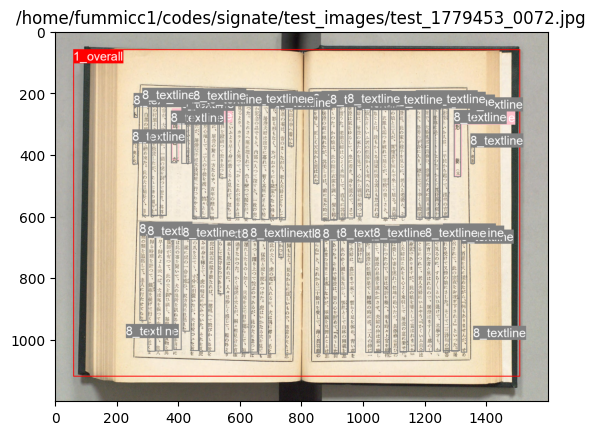

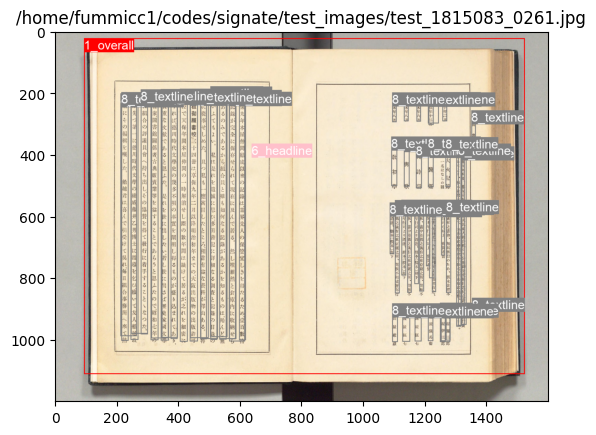

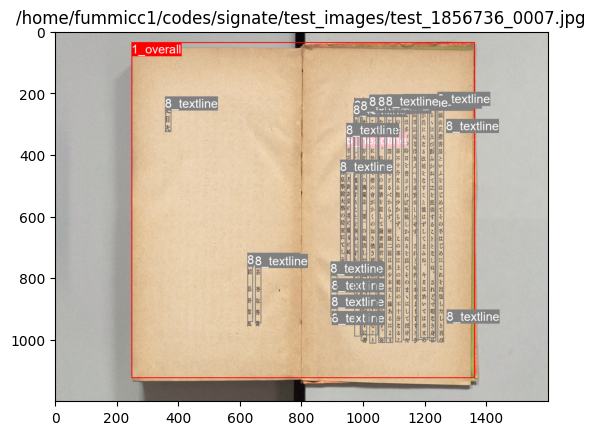

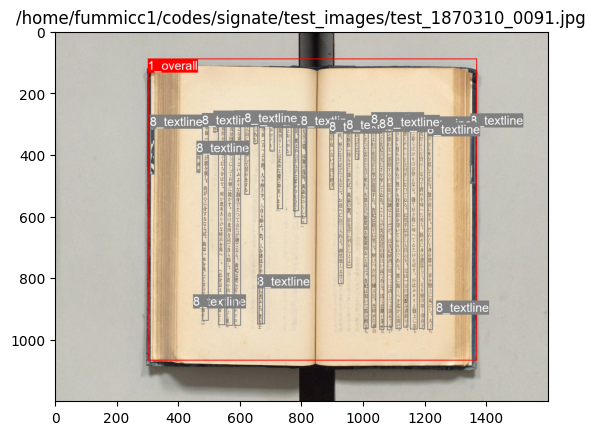

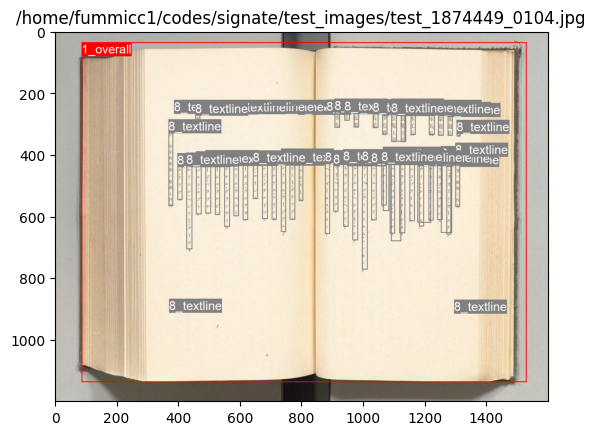

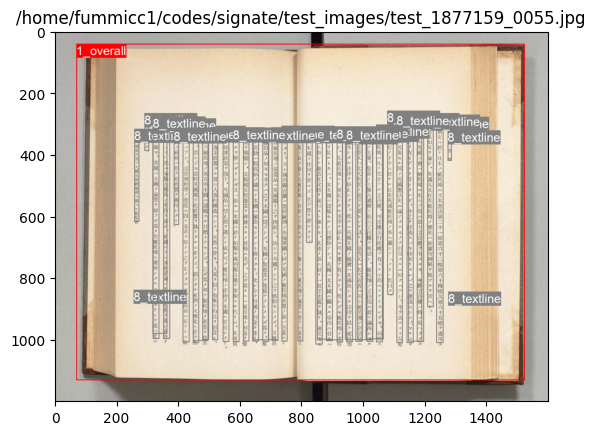

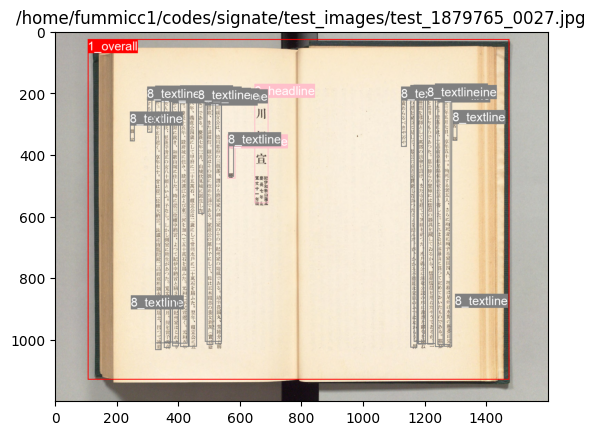

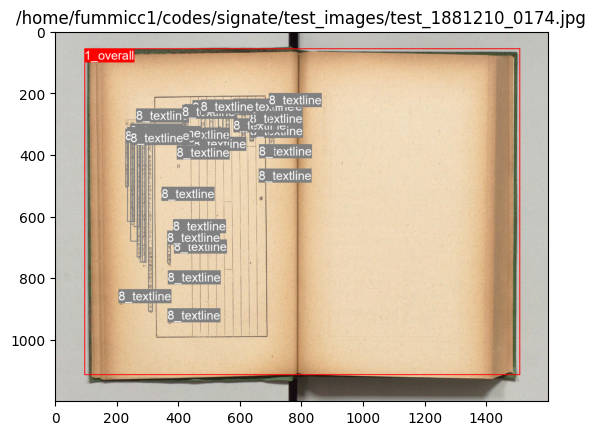

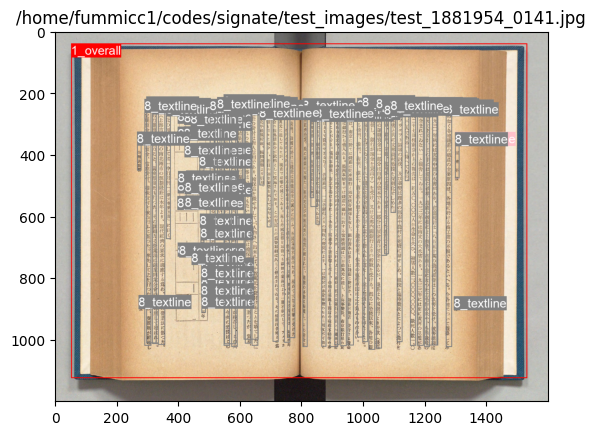

In [7]:

cnt = 0
with open(result_path, "r") as f:
    data = json.load(f)
    print(data.keys())
    for key in data.keys():    
        cnt += 1
        start = 100
        if cnt <= start or cnt >= start + 10:
            continue    
        img_path = pathlib.Path("/home/fummicc1/codes/signate") / "test_images" / key
        if not img_path.exists():
            continue
        img = im_open(img_path).convert("RGB")
        draw = ImageDraw(img)
        for category, boxes in data[key].items():            
            for box in boxes:
                fnt = ImageFont.truetype("/home/fummicc1/codes/signate/arial.ttf", size=40)
                text_w, text_h = fnt.getsize(category)
                # print("category", category, "box", box)
                draw.rectangle(box, outline=all_labels[category], width=3)
                draw.rectangle([box[0], box[1], box[0] + text_w, box[1] + text_h], fill=all_labels[category])
                draw.text([box[0], box[1]], category, font=fnt, fill="white")                
        fig, ax = plt.subplots(1, 1)
        ax.set_title(img_path)
        ax.imshow(img)

plt.show()